# 📊 Exploratory Data Analysis (EDA)
## Hotel Booking Cancellation Prediction

**Mục tiêu:**
1. Hiểu cấu trúc và đặc điểm của dữ liệu
2. Phân tích phân phối các biến
3. Tìm hiểu mối quan hệ giữa các biến với target `is_canceled`
4. Phát hiện vấn đề: missing values, outliers, data leakage

**Dataset:** Hotel Booking Demand - Kaggle

## 1. Import Required Libraries

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical tests
from scipy import stats
from scipy.stats import chi2_contingency

# Custom modules
import sys
sys.path.append('..')
from src.data.loader import (
    load_raw_data, 
    print_data_summary, 
    get_column_types,
    NUMERICAL_COLUMNS,
    CATEGORICAL_COLUMNS,
    TARGET_COLUMN,
    LEAKAGE_COLUMNS
)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Plot settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 11

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## 2. Load Dataset

In [2]:
# Load data using custom loader module
df = load_raw_data(file_path='../data/raw/hotel_bookings.csv')

# Display first few rows
df.head()

Loading data from: ../data/raw/hotel_bookings.csv


✓ Loaded 119,390 rows, 32 columns


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.00,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.00,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.00,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.00,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.00,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.00,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03


## 3. Overview Statistics

### 3.1. Basic Info

In [3]:
# Use custom summary function
print_data_summary(df)


DATASET SUMMARY
Rows: 119,390
Columns: 32
Memory: 104.83 MB

--- Missing Values ---
  company: 112,593 (94.31%)
  agent: 16,340 (13.69%)
  country: 488 (0.41%)
  children: 4 (0.00%)

--- Target Distribution ---
  Not Canceled (0): 75,166 (62.96%)
  Canceled (1): 44,224 (37.04%)


In [4]:
# Detailed info
print("="*50)
print("DETAILED INFO")
print("="*50)
df.info()

DETAILED INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  me

### 3.2. Descriptive Statistics (Numerical)

In [5]:
# Descriptive statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.00,0.37,0.48,0.00,0.00,0.00,1.00,1.00
lead_time,119390.00,104.01,106.86,0.00,18.00,69.00,160.00,737.00
arrival_date_year,119390.00,2016.16,0.71,2015.00,2016.00,2016.00,2017.00,2017.00
arrival_date_week_number,119390.00,27.17,13.61,1.00,16.00,28.00,38.00,53.00
arrival_date_day_of_month,119390.00,15.80,8.78,1.00,8.00,16.00,23.00,31.00
stays_in_weekend_nights,119390.00,0.93,1.00,0.00,0.00,1.00,2.00,19.00
stays_in_week_nights,119390.00,2.50,1.91,0.00,1.00,2.00,3.00,50.00
adults,119390.00,1.86,0.58,0.00,2.00,2.00,2.00,55.00
children,119386.00,0.10,0.40,0.00,0.00,0.00,0.00,10.00
babies,119390.00,0.01,0.10,0.00,0.00,0.00,0.00,10.00


### 3.3. Categorical Variables Summary

In [6]:
# Categorical columns summary
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Số cột categorical: {len(cat_cols)}\n")

for col in cat_cols:
    print(f"--- {col} ---")
    print(f"Unique values: {df[col].nunique()}")
    print(df[col].value_counts().head(5))
    print()

Số cột categorical: 12

--- hotel ---


Unique values: 2
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

--- arrival_date_month ---


Unique values: 12
arrival_date_month
August     13877
July       12661
May        11791
October    11160
April      11089
Name: count, dtype: int64

--- meal ---
Unique values: 5
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

--- country ---
Unique values: 177
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
Name: count, dtype: int64

--- market_segment ---
Unique values: 8
market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Name: count, dtype: int64

--- distribution_channel ---
Unique values: 5
distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

--- reserved_room_type ---
Unique values: 10
reserved_room_type
A    85994
D    19201
E     6535
F     2897
G     2094
Name: count, dtype: int64

--- assigned_room_type ---


## 4. Missing Values Analysis

In [7]:
# Calculate missing values
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).values,
    'Data_Type': df.dtypes.values
})

# Sort by missing percentage
missing_df = missing_df.sort_values('Missing_Percentage', ascending=False)
missing_df = missing_df[missing_df['Missing_Count'] > 0]

print("="*60)
print("MISSING VALUES SUMMARY")
print("="*60)
print(f"\nTổng số cột có missing: {len(missing_df)}")
print(f"Tổng số missing values: {df.isnull().sum().sum():,}")
print()
missing_df

MISSING VALUES SUMMARY

Tổng số cột có missing: 4
Tổng số missing values: 129,425



,Column,Missing_Count,Missing_Percentage,Data_Type
24,company,112593,94.31,float64
23,agent,16340,13.69,float64
13,country,488,0.41,object
10,children,4,0.00,float64


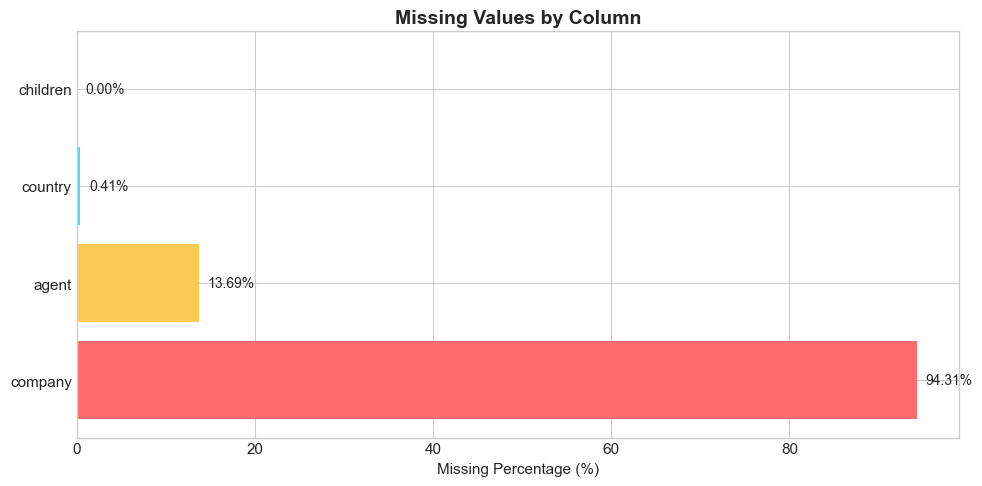


⚠️ Lưu ý:
- company: 94.31% missing → Nên DROP
- agent: 13.69% missing → Xử lý (fill với 0 hoặc 'Unknown')
- country: 0.41% missing → Fill với mode
- children: 0.00% missing → Fill với 0


In [8]:
# Visualize missing values
fig, ax = plt.subplots(figsize=(10, 5))

colors = ['#ff6b6b' if pct > 50 else '#feca57' if pct > 10 else '#48dbfb' 
          for pct in missing_df['Missing_Percentage']]

bars = ax.barh(missing_df['Column'], missing_df['Missing_Percentage'], color=colors)
ax.set_xlabel('Missing Percentage (%)')
ax.set_title('Missing Values by Column', fontsize=14, fontweight='bold')

# Add percentage labels
for bar, pct in zip(bars, missing_df['Missing_Percentage']):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
            f'{pct:.2f}%', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('../outputs/figures/missing_values.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n⚠️ Lưu ý:")
print("- company: 94.31% missing → Nên DROP")
print("- agent: 13.69% missing → Xử lý (fill với 0 hoặc 'Unknown')")
print("- country: 0.41% missing → Fill với mode")
print("- children: 0.00% missing → Fill với 0")

## 5. Data Dictionary and Variable Classification

### 5.1. Data Dictionary

In [9]:
# Data Dictionary
data_dict = {
    'Column': [
        'hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
        'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights',
        'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country',
        'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
        'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type',
        'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list',
        'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests',
        'reservation_status', 'reservation_status_date'
    ],
    'Description': [
        'Loại khách sạn (Resort Hotel / City Hotel)',
        '⭐ TARGET: Booking có bị huỷ không (0=Không, 1=Có)',
        'Số ngày từ khi đặt đến ngày nhận phòng',
        'Năm nhận phòng (2015-2017)',
        'Tháng nhận phòng',
        'Số tuần trong năm của ngày nhận phòng',
        'Ngày trong tháng của ngày nhận phòng',
        'Số đêm cuối tuần (Thứ 7, Chủ nhật)',
        'Số đêm trong tuần (Thứ 2-6)',
        'Số người lớn',
        'Số trẻ em',
        'Số em bé',
        'Loại bữa ăn đã đặt',
        'Quốc gia của khách',
        'Phân khúc thị trường (Online TA, Offline TA/TO, Direct, etc.)',
        'Kênh phân phối (TA/TO, Direct, Corporate, etc.)',
        'Khách có phải là khách quay lại không (0/1)',
        'Số lần huỷ booking trước đó',
        'Số lần booking trước đó không bị huỷ',
        'Loại phòng đã đặt',
        'Loại phòng được gán (có thể khác với đặt)',
        'Số lần thay đổi booking',
        'Loại đặt cọc (No Deposit, Non Refund, Refundable)',
        'ID của đại lý du lịch',
        'ID của công ty đặt phòng',
        'Số ngày booking nằm trong danh sách chờ',
        'Loại khách hàng (Transient, Contract, Group, etc.)',
        'Average Daily Rate - Giá phòng trung bình mỗi đêm',
        'Số chỗ đỗ xe yêu cầu',
        'Số yêu cầu đặc biệt',
        '⚠️ LEAKAGE: Trạng thái cuối cùng (Check-Out/Canceled/No-Show)',
        '⚠️ LEAKAGE: Ngày cập nhật trạng thái'
    ],
    'Type': [
        'Categorical', 'Target (Binary)', 'Numerical', 'Numerical', 'Categorical',
        'Numerical', 'Numerical', 'Numerical', 'Numerical', 'Numerical',
        'Numerical', 'Numerical', 'Categorical', 'Categorical', 'Categorical',
        'Categorical', 'Binary', 'Numerical', 'Numerical', 'Categorical',
        'Categorical', 'Numerical', 'Categorical', 'Numerical', 'Numerical',
        'Numerical', 'Categorical', 'Numerical', 'Numerical', 'Numerical',
        'LEAKAGE', 'LEAKAGE'
    ]
}

data_dict_df = pd.DataFrame(data_dict)
data_dict_df.index = range(1, len(data_dict_df) + 1)
data_dict_df

,Column,Description,Type
1,hotel,Loại khách sạn (Resort Hotel / City Hotel),Categorical
2,is_canceled,"⭐ TARGET: Booking có bị huỷ không (0=Không, 1=Có)",Target (Binary)
3,lead_time,Số ngày từ khi đặt đến ngày nhận phòng,Numerical
4,arrival_date_year,Năm nhận phòng (2015-2017),Numerical
5,arrival_date_month,Tháng nhận phòng,Categorical
6,arrival_date_week_number,Số tuần trong năm của ngày nhận phòng,Numerical
7,arrival_date_day_of_month,Ngày trong tháng của ngày nhận phòng,Numerical
8,stays_in_weekend_nights,"Số đêm cuối tuần (Thứ 7, Chủ nhật)",Numerical
9,stays_in_week_nights,Số đêm trong tuần (Thứ 2-6),Numerical
10,adults,Số người lớn,Numerical


### 5.2. Variable Classification

In [10]:
# Get column types from loader module
col_types = get_column_types(df)

print("="*60)
print("VARIABLE CLASSIFICATION")
print("="*60)
print(f"\n🎯 TARGET: {col_types['target']}")
print(f"\n📊 NUMERICAL ({len(col_types['numerical'])} columns):")
for i, col in enumerate(col_types['numerical'], 1):
    print(f"   {i}. {col}")

print(f"\n📋 CATEGORICAL ({len(col_types['categorical'])} columns):")
for i, col in enumerate(col_types['categorical'], 1):
    print(f"   {i}. {col}")

print(f"\n⚠️ LEAKAGE ({len(col_types['leakage'])} columns):")
for col in col_types['leakage']:
    print(f"   - {col}")

VARIABLE CLASSIFICATION

🎯 TARGET: is_canceled

📊 NUMERICAL (19 columns):
   1. lead_time
   2. arrival_date_year
   3. arrival_date_week_number
   4. arrival_date_day_of_month
   5. stays_in_weekend_nights
   6. stays_in_week_nights
   7. adults
   8. children
   9. babies
   10. is_repeated_guest
   11. previous_cancellations
   12. previous_bookings_not_canceled
   13. booking_changes
   14. agent
   15. company
   16. days_in_waiting_list
   17. adr
   18. required_car_parking_spaces
   19. total_of_special_requests

📋 CATEGORICAL (11 columns):
   1. hotel
   2. arrival_date_month
   3. meal
   4. country
   5. market_segment
   6. distribution_channel
   7. reserved_room_type
   8. assigned_room_type
   9. deposit_type
   10. customer_type
   11. reservation_status

⚠️ LEAKAGE (2 columns):
   - reservation_status
   - reservation_status_date


## 6. Target Variable Distribution (is_canceled)

**Kiểm tra Imbalance của biến target**

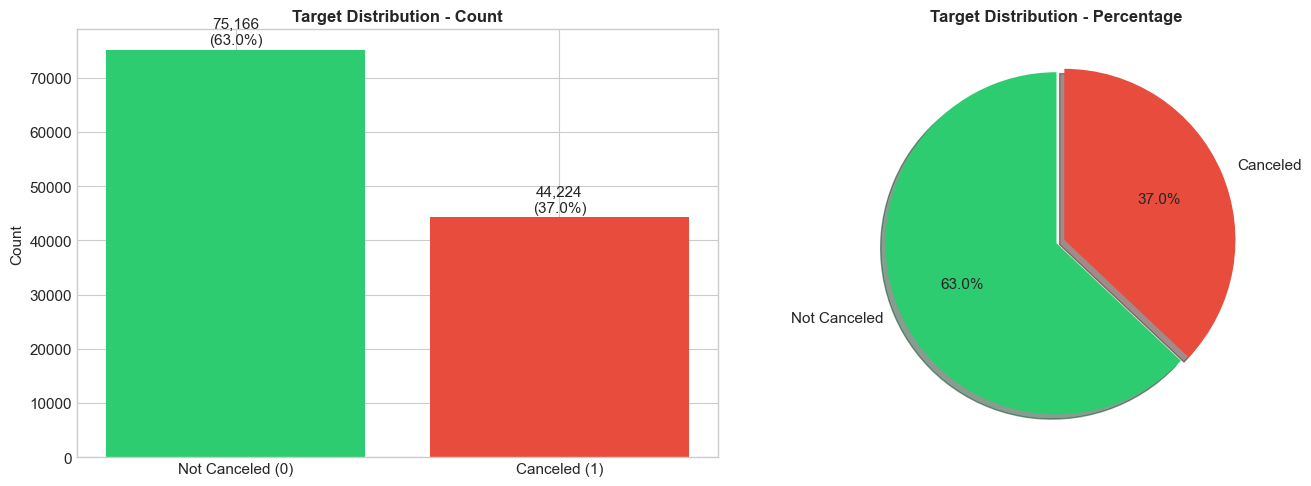

TARGET DISTRIBUTION SUMMARY
Not Canceled (0): 75,166 (62.96%)
Canceled (1):     44,224 (37.04%)

Imbalance Ratio: 1:1.70

⚠️ Dataset có IMBALANCED (37% vs 63%)
→ Cần xử lý: SMOTE / class_weight / PR-AUC metric


In [11]:
# Target distribution
target_counts = df['is_canceled'].value_counts()
target_pct = df['is_canceled'].value_counts(normalize=True) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
colors = ['#2ecc71', '#e74c3c']
bars = axes[0].bar(['Not Canceled (0)', 'Canceled (1)'], target_counts.values, color=colors)
axes[0].set_ylabel('Count')
axes[0].set_title('Target Distribution - Count', fontsize=12, fontweight='bold')

# Add labels
for bar, count, pct in zip(bars, target_counts.values, target_pct.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000, 
                 f'{count:,}\n({pct:.1f}%)', ha='center', fontsize=11)

# Pie chart
axes[1].pie(target_counts.values, labels=['Not Canceled', 'Canceled'], 
            colors=colors, autopct='%1.1f%%', startangle=90,
            explode=(0, 0.05), shadow=True)
axes[1].set_title('Target Distribution - Percentage', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/target_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

# Summary
print("="*50)
print("TARGET DISTRIBUTION SUMMARY")
print("="*50)
print(f"Not Canceled (0): {target_counts[0]:,} ({target_pct[0]:.2f}%)")
print(f"Canceled (1):     {target_counts[1]:,} ({target_pct[1]:.2f}%)")
print(f"\nImbalance Ratio: 1:{target_counts[0]/target_counts[1]:.2f}")
print("\n⚠️ Dataset có IMBALANCED (37% vs 63%)")
print("→ Cần xử lý: SMOTE / class_weight / PR-AUC metric")

## 7. Lead Time Distribution Analysis

`lead_time`: Số ngày từ khi đặt phòng đến ngày nhận phòng - Đây là feature quan trọng!

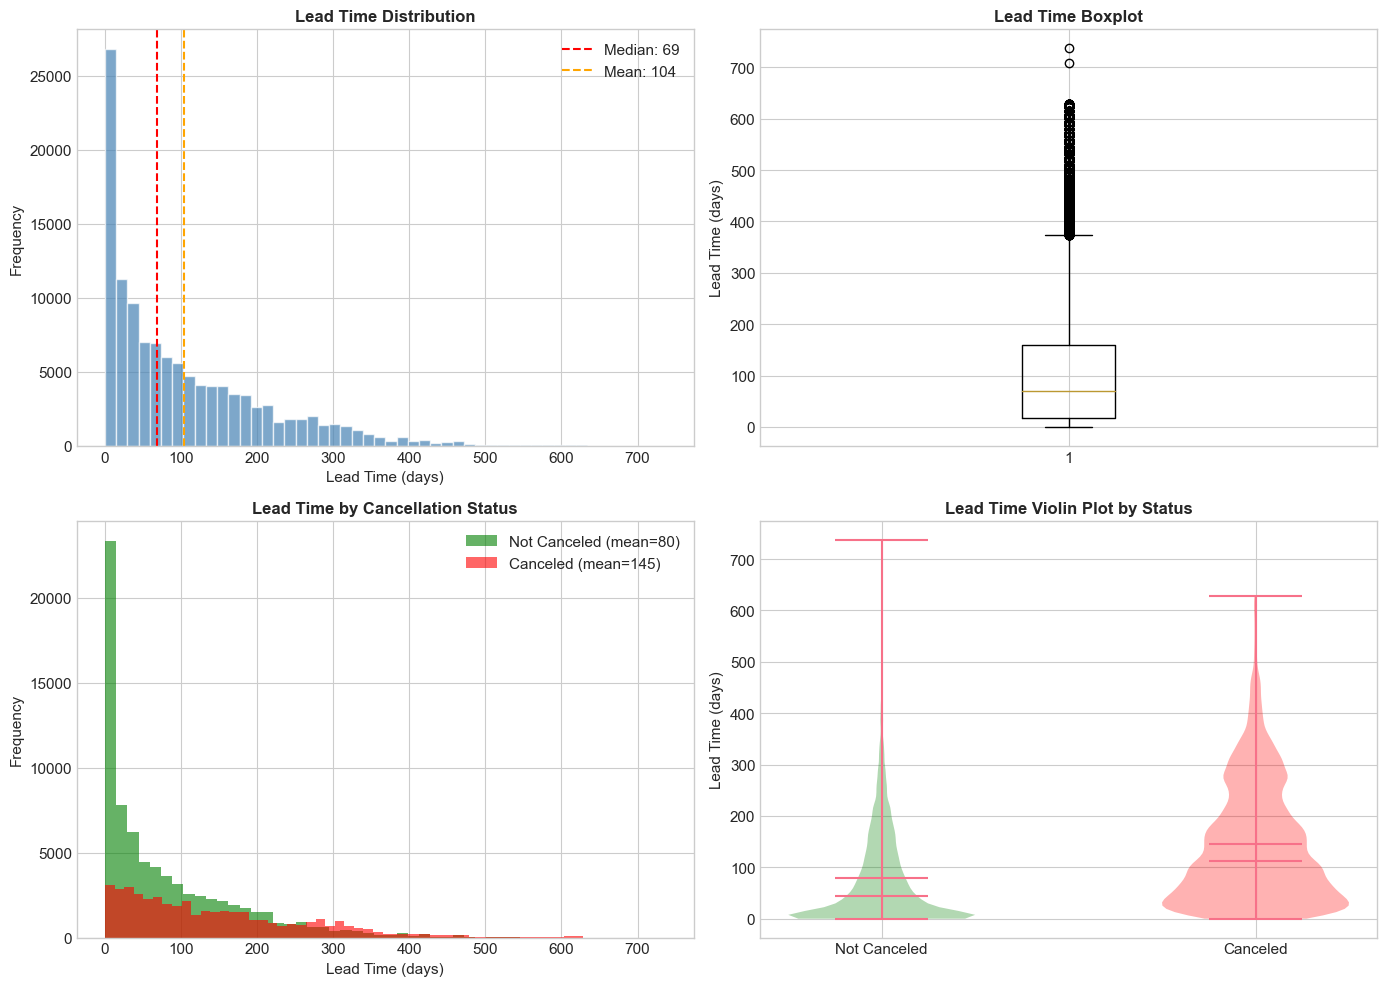

LEAD TIME STATISTICS

Overall:
  Mean: 104.0 days
  Median: 69 days
  Std: 106.9 days
  Min: 0 days
  Max: 737 days

By Cancellation Status:
  Not Canceled - Mean: 80.0 days
  Canceled - Mean: 144.8 days

💡 Insight: Booking bị huỷ có lead_time cao hơn đáng kể!
   → Lead time dài = Rủi ro huỷ cao hơn


In [12]:
# Lead time analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Overall histogram
axes[0, 0].hist(df['lead_time'], bins=50, color='steelblue', edgecolor='white', alpha=0.7)
axes[0, 0].set_xlabel('Lead Time (days)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Lead Time Distribution', fontsize=12, fontweight='bold')
axes[0, 0].axvline(df['lead_time'].median(), color='red', linestyle='--', label=f'Median: {df["lead_time"].median():.0f}')
axes[0, 0].axvline(df['lead_time'].mean(), color='orange', linestyle='--', label=f'Mean: {df["lead_time"].mean():.0f}')
axes[0, 0].legend()

# 2. Boxplot
axes[0, 1].boxplot(df['lead_time'], vert=True)
axes[0, 1].set_ylabel('Lead Time (days)')
axes[0, 1].set_title('Lead Time Boxplot', fontsize=12, fontweight='bold')

# 3. Lead time by cancellation status
df_not_canceled = df[df['is_canceled'] == 0]['lead_time']
df_canceled = df[df['is_canceled'] == 1]['lead_time']

axes[1, 0].hist(df_not_canceled, bins=50, alpha=0.6, label=f'Not Canceled (mean={df_not_canceled.mean():.0f})', color='green')
axes[1, 0].hist(df_canceled, bins=50, alpha=0.6, label=f'Canceled (mean={df_canceled.mean():.0f})', color='red')
axes[1, 0].set_xlabel('Lead Time (days)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Lead Time by Cancellation Status', fontsize=12, fontweight='bold')
axes[1, 0].legend()

# 4. Violin plot
violin_data = [df_not_canceled, df_canceled]
vp = axes[1, 1].violinplot(violin_data, positions=[0, 1], showmeans=True, showmedians=True)
vp['bodies'][0].set_facecolor('green')
vp['bodies'][1].set_facecolor('red')
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['Not Canceled', 'Canceled'])
axes[1, 1].set_ylabel('Lead Time (days)')
axes[1, 1].set_title('Lead Time Violin Plot by Status', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/lead_time_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# Statistics
print("="*50)
print("LEAD TIME STATISTICS")
print("="*50)
print(f"\nOverall:")
print(f"  Mean: {df['lead_time'].mean():.1f} days")
print(f"  Median: {df['lead_time'].median():.0f} days")
print(f"  Std: {df['lead_time'].std():.1f} days")
print(f"  Min: {df['lead_time'].min()} days")
print(f"  Max: {df['lead_time'].max()} days")

print(f"\nBy Cancellation Status:")
print(f"  Not Canceled - Mean: {df_not_canceled.mean():.1f} days")
print(f"  Canceled - Mean: {df_canceled.mean():.1f} days")
print(f"\n💡 Insight: Booking bị huỷ có lead_time cao hơn đáng kể!")
print(f"   → Lead time dài = Rủi ro huỷ cao hơn")

## 8. Cancellation Rate by Hotel Type

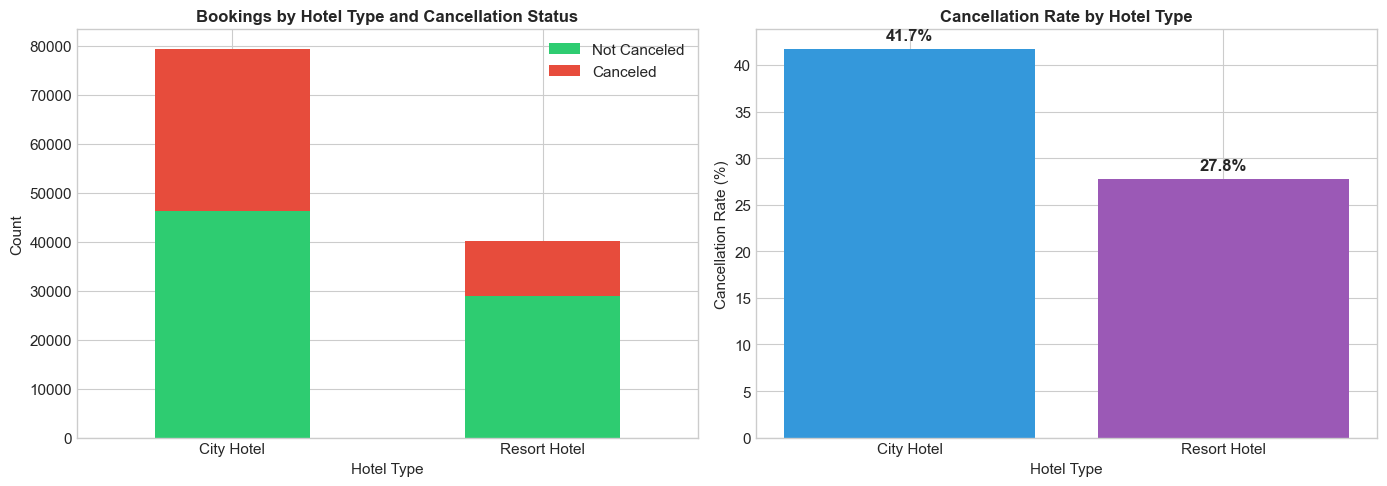

CANCELLATION BY HOTEL TYPE
              Canceled  Total  Cancel_Rate
hotel                                     
City Hotel       33102  79330        41.73
Resort Hotel     11122  40060        27.76

💡 Insight: City Hotel có tỷ lệ huỷ cao hơn Resort Hotel


In [13]:
# Cancellation by hotel type
hotel_cancel = df.groupby('hotel')['is_canceled'].agg(['sum', 'count'])
hotel_cancel['cancel_rate'] = hotel_cancel['sum'] / hotel_cancel['count'] * 100
hotel_cancel.columns = ['Canceled', 'Total', 'Cancel_Rate']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Stacked bar chart
hotel_crosstab = pd.crosstab(df['hotel'], df['is_canceled'])
hotel_crosstab.plot(kind='bar', stacked=True, ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_xlabel('Hotel Type')
axes[0].set_ylabel('Count')
axes[0].set_title('Bookings by Hotel Type and Cancellation Status', fontsize=12, fontweight='bold')
axes[0].legend(['Not Canceled', 'Canceled'])
axes[0].tick_params(axis='x', rotation=0)

# 2. Cancellation rate bar chart
colors = ['#3498db', '#9b59b6']
bars = axes[1].bar(hotel_cancel.index, hotel_cancel['Cancel_Rate'], color=colors)
axes[1].set_xlabel('Hotel Type')
axes[1].set_ylabel('Cancellation Rate (%)')
axes[1].set_title('Cancellation Rate by Hotel Type', fontsize=12, fontweight='bold')

for bar, rate in zip(bars, hotel_cancel['Cancel_Rate']):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 f'{rate:.1f}%', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/hotel_type_cancellation.png', dpi=150, bbox_inches='tight')
plt.show()

# Summary table
print("="*60)
print("CANCELLATION BY HOTEL TYPE")
print("="*60)
print(hotel_cancel.to_string())
print(f"\n💡 Insight: City Hotel có tỷ lệ huỷ cao hơn Resort Hotel")

## 9. Cancellation Rate by Month and Season

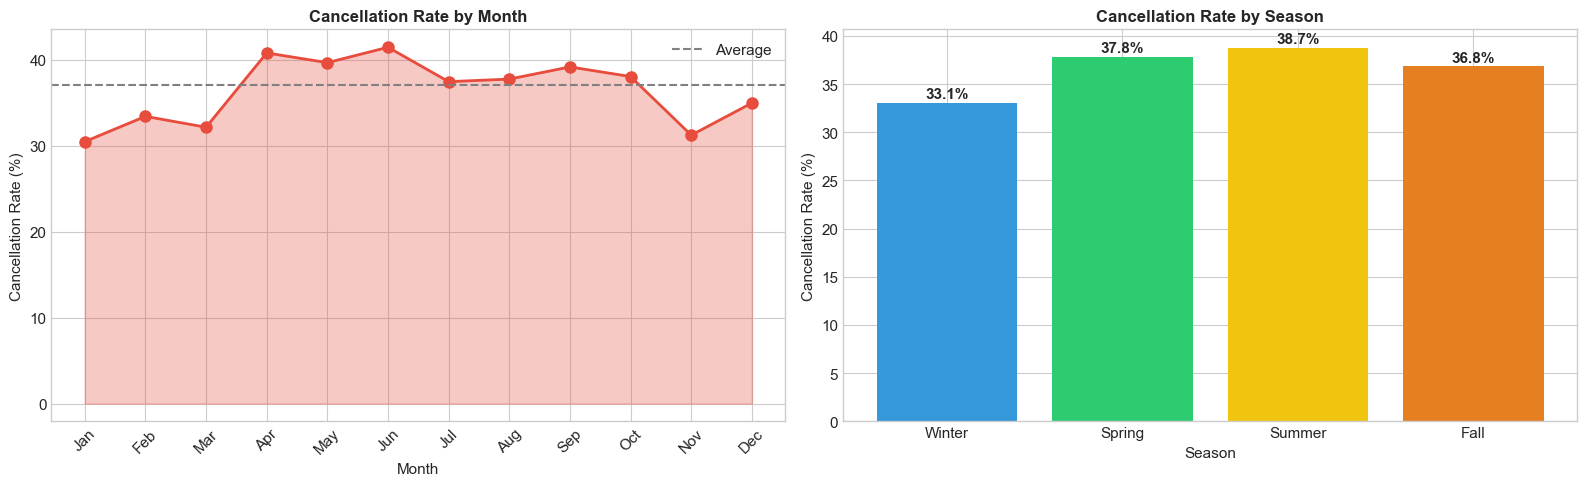

MONTHLY & SEASONAL CANCELLATION RATES

By Month:
  January: 30.5%
  February: 33.4%
  March: 32.2%
  April: 40.8%
  May: 39.7%
  June: 41.5%
  July: 37.5%
  August: 37.8%
  September: 39.2%
  October: 38.0%
  November: 31.2%
  December: 35.0%

By Season:
  Winter: 33.1%
  Spring: 37.8%
  Summer: 38.7%
  Fall: 36.8%

💡 Insight: Mùa hè có tỷ lệ huỷ cao nhất


In [14]:
# Create season mapping
season_map = {
    'December': 'Winter', 'January': 'Winter', 'February': 'Winter',
    'March': 'Spring', 'April': 'Spring', 'May': 'Spring',
    'June': 'Summer', 'July': 'Summer', 'August': 'Summer',
    'September': 'Fall', 'October': 'Fall', 'November': 'Fall'
}

# Month order for plotting
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df['season'] = df['arrival_date_month'].map(season_map)

# Calculate cancellation rate by month
monthly_cancel = df.groupby('arrival_date_month')['is_canceled'].mean() * 100
monthly_cancel = monthly_cancel.reindex(month_order)

# Calculate cancellation rate by season
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_cancel = df.groupby('season')['is_canceled'].mean() * 100
season_cancel = season_cancel.reindex(season_order)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# 1. Monthly cancellation rate
axes[0].plot(range(12), monthly_cancel.values, marker='o', linewidth=2, markersize=8, color='#e74c3c')
axes[0].fill_between(range(12), monthly_cancel.values, alpha=0.3, color='#e74c3c')
axes[0].set_xticks(range(12))
axes[0].set_xticklabels([m[:3] for m in month_order], rotation=45)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Cancellation Rate (%)')
axes[0].set_title('Cancellation Rate by Month', fontsize=12, fontweight='bold')
axes[0].axhline(y=df['is_canceled'].mean()*100, color='gray', linestyle='--', label='Average')
axes[0].legend()

# 2. Seasonal cancellation rate
colors = ['#3498db', '#2ecc71', '#f1c40f', '#e67e22']
bars = axes[1].bar(season_cancel.index, season_cancel.values, color=colors)
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Cancellation Rate (%)')
axes[1].set_title('Cancellation Rate by Season', fontsize=12, fontweight='bold')

for bar, rate in zip(bars, season_cancel.values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                 f'{rate:.1f}%', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/monthly_seasonal_cancellation.png', dpi=150, bbox_inches='tight')
plt.show()

# Summary
print("="*60)
print("MONTHLY & SEASONAL CANCELLATION RATES")
print("="*60)
print("\nBy Month:")
for month, rate in monthly_cancel.items():
    print(f"  {month}: {rate:.1f}%")

print("\nBy Season:")
for season, rate in season_cancel.items():
    print(f"  {season}: {rate:.1f}%")

print(f"\n💡 Insight: Mùa hè có tỷ lệ huỷ cao nhất")

## 10. Cancellation Rate by Market Segment

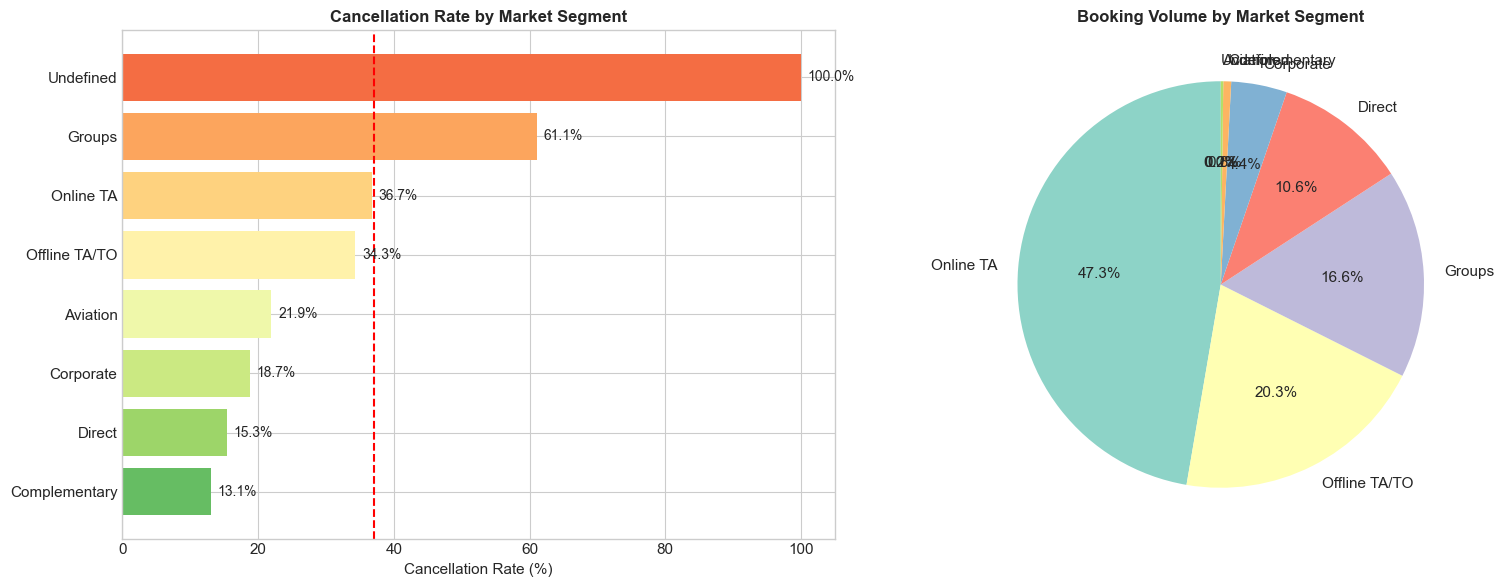

CANCELLATION BY MARKET SEGMENT
                Canceled  Total  Cancel_Rate
market_segment                              
Complementary         97    743        13.06
Direct              1934  12606        15.34
Corporate            992   5295        18.73
Aviation              52    237        21.94
Offline TA/TO       8311  24219        34.32
Online TA          20739  56477        36.72
Groups             12097  19811        61.06
Undefined              2      2       100.00

💡 Insights:
- Groups có tỷ lệ huỷ cao nhất
- Direct bookings có tỷ lệ huỷ thấp nhất
- Online TA chiếm số lượng lớn nhất


In [15]:
# Cancellation by market segment
segment_stats = df.groupby('market_segment').agg({
    'is_canceled': ['sum', 'count', 'mean']
}).round(4)
segment_stats.columns = ['Canceled', 'Total', 'Cancel_Rate']
segment_stats['Cancel_Rate'] = segment_stats['Cancel_Rate'] * 100
segment_stats = segment_stats.sort_values('Cancel_Rate', ascending=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Horizontal bar chart - Cancellation rate
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(segment_stats)))
bars = axes[0].barh(segment_stats.index, segment_stats['Cancel_Rate'], color=colors)
axes[0].set_xlabel('Cancellation Rate (%)')
axes[0].set_title('Cancellation Rate by Market Segment', fontsize=12, fontweight='bold')
axes[0].axvline(x=df['is_canceled'].mean()*100, color='red', linestyle='--', label='Average')

for bar, rate in zip(bars, segment_stats['Cancel_Rate']):
    axes[0].text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
                 f'{rate:.1f}%', va='center', fontsize=10)

# 2. Booking volume by segment
segment_counts = df['market_segment'].value_counts()
axes[1].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=plt.cm.Set3.colors[:len(segment_counts)])
axes[1].set_title('Booking Volume by Market Segment', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/figures/market_segment_cancellation.png', dpi=150, bbox_inches='tight')
plt.show()

# Summary
print("="*60)
print("CANCELLATION BY MARKET SEGMENT")
print("="*60)
print(segment_stats.to_string())
print(f"\n💡 Insights:")
print("- Groups có tỷ lệ huỷ cao nhất")
print("- Direct bookings có tỷ lệ huỷ thấp nhất")
print("- Online TA chiếm số lượng lớn nhất")

## 11. Cancellation Rate by Country (Top 10)

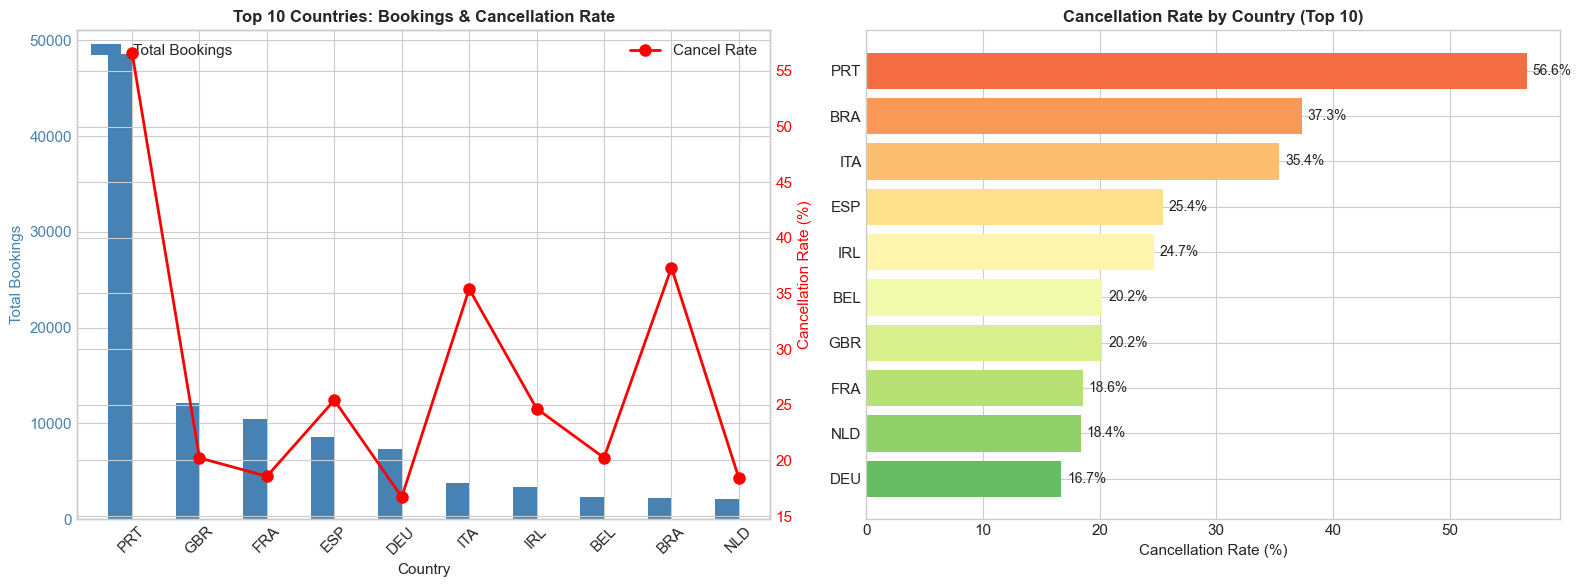

TOP 10 COUNTRIES BY BOOKING VOLUME
         Canceled  Total  Cancel_Rate
country                              
PRT         27519  48590        56.64
GBR          2453  12129        20.22
FRA          1934  10415        18.57
ESP          2177   8568        25.41
DEU          1218   7287        16.71
ITA          1333   3766        35.40
IRL           832   3375        24.65
BEL           474   2342        20.24
BRA           830   2224        37.32
NLD           387   2104        18.39

💡 Insight: Portugal (PRT) có số lượng booking lớn nhất nhưng tỷ lệ huỷ cũng cao


In [16]:
# Top 10 countries by booking volume
top_countries = df['country'].value_counts().head(10).index.tolist()

# Filter for top countries
df_top_countries = df[df['country'].isin(top_countries)]

# Calculate stats
country_stats = df_top_countries.groupby('country').agg({
    'is_canceled': ['sum', 'count', 'mean']
})
country_stats.columns = ['Canceled', 'Total', 'Cancel_Rate']
country_stats['Cancel_Rate'] = country_stats['Cancel_Rate'] * 100
country_stats = country_stats.sort_values('Total', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Booking volume vs Cancellation rate
x = np.arange(len(country_stats))
width = 0.35

ax1 = axes[0]
bars1 = ax1.bar(x - width/2, country_stats['Total'], width, label='Total Bookings', color='steelblue')
ax1.set_xlabel('Country')
ax1.set_ylabel('Total Bookings', color='steelblue')
ax1.set_xticks(x)
ax1.set_xticklabels(country_stats.index, rotation=45)
ax1.tick_params(axis='y', labelcolor='steelblue')

ax2 = ax1.twinx()
ax2.plot(x, country_stats['Cancel_Rate'], 'ro-', linewidth=2, markersize=8, label='Cancel Rate')
ax2.set_ylabel('Cancellation Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.set_title('Top 10 Countries: Bookings & Cancellation Rate', fontsize=12, fontweight='bold')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 2. Cancellation rate sorted
country_by_rate = country_stats.sort_values('Cancel_Rate', ascending=True)
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(country_by_rate)))
bars = axes[1].barh(country_by_rate.index, country_by_rate['Cancel_Rate'], color=colors)
axes[1].set_xlabel('Cancellation Rate (%)')
axes[1].set_title('Cancellation Rate by Country (Top 10)', fontsize=12, fontweight='bold')

for bar, rate in zip(bars, country_by_rate['Cancel_Rate']):
    axes[1].text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
                 f'{rate:.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('../outputs/figures/country_cancellation.png', dpi=150, bbox_inches='tight')
plt.show()

# Summary
print("="*60)
print("TOP 10 COUNTRIES BY BOOKING VOLUME")
print("="*60)
print(country_stats.to_string())
print(f"\n💡 Insight: Portugal (PRT) có số lượng booking lớn nhất nhưng tỷ lệ huỷ cũng cao")

## 12. Correlation Analysis for Numerical Features

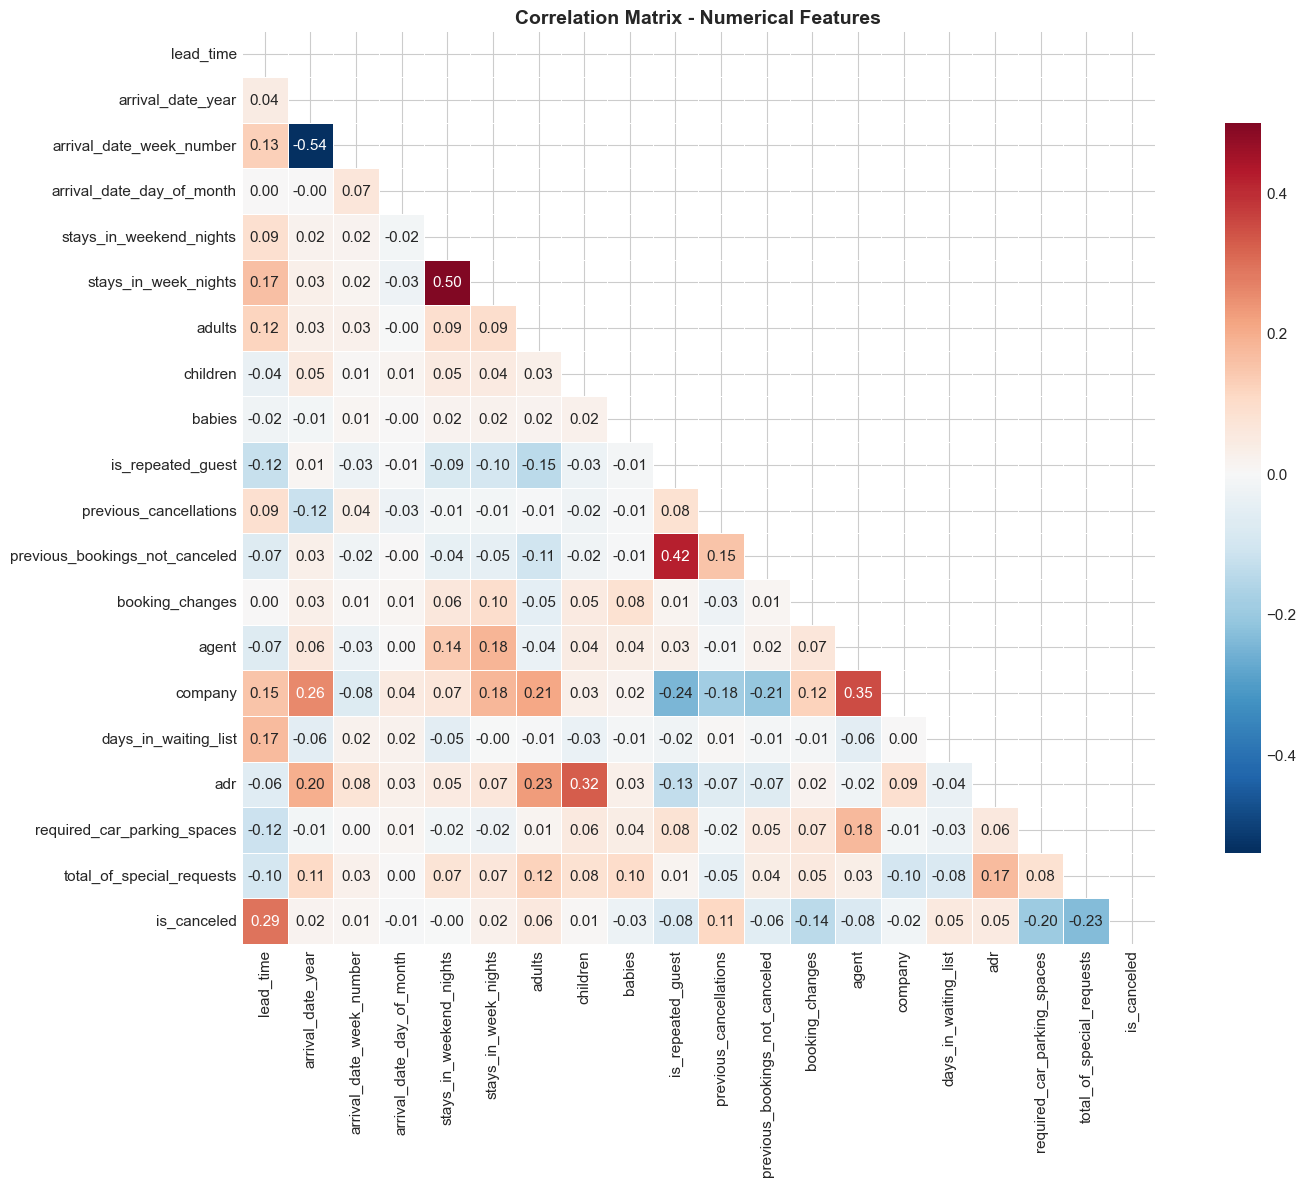

CORRELATION WITH TARGET (is_canceled)

Top correlations with is_canceled:
  lead_time: 0.2931 ↑
  total_of_special_requests: -0.2347 ↓
  required_car_parking_spaces: -0.1955 ↓
  booking_changes: -0.1444 ↓
  previous_cancellations: 0.1101 ↑
  is_repeated_guest: -0.0848 ↓
  agent: -0.0831 ↓
  adults: 0.0600 ↑
  previous_bookings_not_canceled: -0.0574 ↓
  days_in_waiting_list: 0.0542 ↑

💡 Insights:
- lead_time có tương quan dương cao nhất với huỷ
- total_of_special_requests có tương quan âm (ít huỷ hơn)
- previous_cancellations có tương quan dương (huỷ nhiều trước = huỷ nhiều sau)


In [17]:
# Select numerical columns (exclude leakage)
num_cols = [col for col in NUMERICAL_COLUMNS if col in df.columns and col not in LEAKAGE_COLUMNS]
num_cols.append('is_canceled')  # Add target

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Plot heatmap
fig, ax = plt.subplots(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, square=True, linewidths=0.5, ax=ax,
            cbar_kws={'shrink': 0.8})
ax.set_title('Correlation Matrix - Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../outputs/figures/correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

# Correlation with target
print("="*60)
print("CORRELATION WITH TARGET (is_canceled)")
print("="*60)
target_corr = corr_matrix['is_canceled'].drop('is_canceled').sort_values(key=abs, ascending=False)
print("\nTop correlations with is_canceled:")
for col, corr in target_corr.head(10).items():
    direction = "↑" if corr > 0 else "↓"
    print(f"  {col}: {corr:.4f} {direction}")

print(f"\n💡 Insights:")
print("- lead_time có tương quan dương cao nhất với huỷ")
print("- total_of_special_requests có tương quan âm (ít huỷ hơn)")
print("- previous_cancellations có tương quan dương (huỷ nhiều trước = huỷ nhiều sau)")

## 13. Chi-Square Test for Categorical Features

Kiểm định Chi-Square để đánh giá mối quan hệ giữa các biến categorical và target `is_canceled`

In [18]:
def cramers_v(x, y):
    """Calculate Cramér's V statistic for categorical-categorical association"""
    contingency = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency)[0]
    n = contingency.sum().sum()
    min_dim = min(contingency.shape) - 1
    return np.sqrt(chi2 / (n * min_dim)) if min_dim > 0 else 0

# Categorical columns (exclude leakage)
cat_cols = [col for col in CATEGORICAL_COLUMNS if col in df.columns and col not in LEAKAGE_COLUMNS]

# Chi-square test results
chi2_results = []
for col in cat_cols:
    contingency = pd.crosstab(df[col], df['is_canceled'])
    chi2, p_value, dof, expected = chi2_contingency(contingency)
    cramers = cramers_v(df[col], df['is_canceled'])
    
    chi2_results.append({
        'Column': col,
        'Chi2_Statistic': chi2,
        'P_Value': p_value,
        'Degrees_Freedom': dof,
        'Cramers_V': cramers,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    })

chi2_df = pd.DataFrame(chi2_results)
chi2_df = chi2_df.sort_values('Cramers_V', ascending=False)

# Display results
print("="*80)
print("CHI-SQUARE TEST RESULTS")
print("="*80)
print("\nH0: Không có mối quan hệ giữa biến categorical và is_canceled")
print("H1: Có mối quan hệ giữa biến categorical và is_canceled")
print("α = 0.05")
print()
chi2_df

CHI-SQUARE TEST RESULTS

H0: Không có mối quan hệ giữa biến categorical và is_canceled
H1: Có mối quan hệ giữa biến categorical và is_canceled
α = 0.05



,Column,Chi2_Statistic,P_Value,Degrees_Freedom,Cramers_V,Significant
8,deposit_type,27677.33,0.00,2,0.48,Yes
3,country,15434.68,0.00,176,0.36,Yes
4,market_segment,8497.22,0.00,7,0.27,Yes
7,assigned_room_type,4918.69,0.00,11,0.20,Yes
5,distribution_channel,3745.79,0.00,4,0.18,Yes
0,hotel,2224.92,0.00,1,0.14,Yes
9,customer_type,2222.50,0.00,3,0.14,Yes
6,reserved_room_type,647.84,0.00,9,0.07,Yes
1,arrival_date_month,588.69,0.00,11,0.07,Yes
2,meal,304.24,0.00,4,0.05,Yes


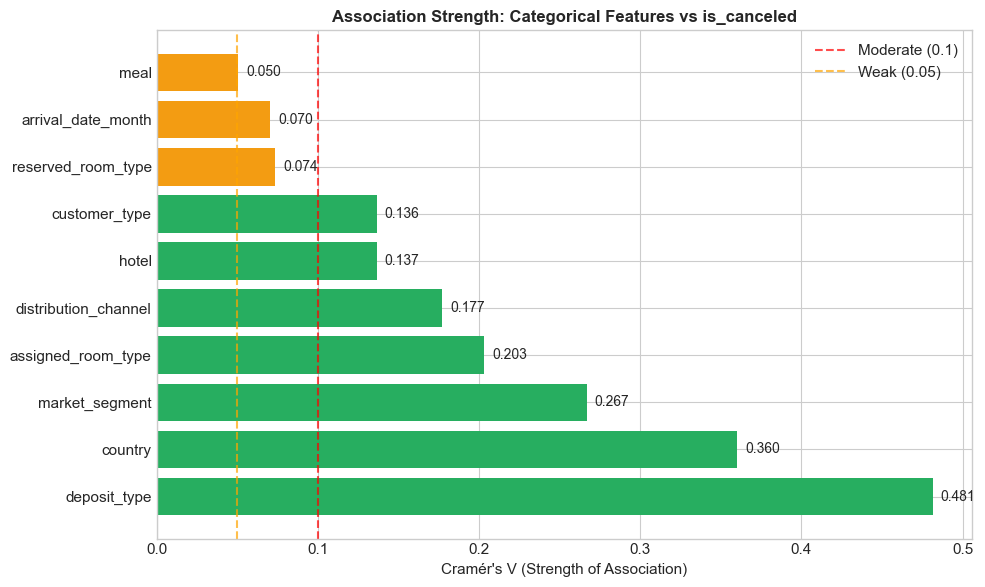


💡 Interpretation of Cramér's V:
  - 0.00-0.05: Negligible
  - 0.05-0.10: Weak
  - 0.10-0.15: Moderate
  - 0.15-0.25: Moderately Strong
  - 0.25+: Strong

✓ Tất cả các biến categorical đều có mối quan hệ significant với target (p < 0.05)


In [19]:
# Visualize Cramér's V
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#27ae60' if v > 0.1 else '#f39c12' if v > 0.05 else '#3498db' 
          for v in chi2_df['Cramers_V']]
bars = ax.barh(chi2_df['Column'], chi2_df['Cramers_V'], color=colors)
ax.set_xlabel("Cramér's V (Strength of Association)")
ax.set_title("Association Strength: Categorical Features vs is_canceled", fontsize=12, fontweight='bold')
ax.axvline(x=0.1, color='red', linestyle='--', alpha=0.7, label='Moderate (0.1)')
ax.axvline(x=0.05, color='orange', linestyle='--', alpha=0.7, label='Weak (0.05)')

for bar, v in zip(bars, chi2_df['Cramers_V']):
    ax.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, 
            f'{v:.3f}', va='center', fontsize=10)

ax.legend()
plt.tight_layout()
plt.savefig('../outputs/figures/chi_square_results.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💡 Interpretation of Cramér's V:")
print("  - 0.00-0.05: Negligible")
print("  - 0.05-0.10: Weak")  
print("  - 0.10-0.15: Moderate")
print("  - 0.15-0.25: Moderately Strong")
print("  - 0.25+: Strong")
print("\n✓ Tất cả các biến categorical đều có mối quan hệ significant với target (p < 0.05)")

## 14. Data Leakage Detection ⚠️

**QUAN TRỌNG**: Cần loại bỏ các biến có thể gây rò rỉ thông tin từ tương lai vào mô hình.

Các biến cần kiểm tra:
- `reservation_status`: Trạng thái cuối cùng của booking (Check-Out/Canceled/No-Show) → **LEAKAGE TRỰC TIẾP**
- `reservation_status_date`: Ngày cập nhật trạng thái → **LEAKAGE TRỰC TIẾP**
- `assigned_room_type` vs `reserved_room_type`: Có thể có thông tin về cancellation

⚠️  PHÁT HIỆN DATA LEAKAGE - reservation_status

Phân phối reservation_status:
reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64

📊 Crosstab reservation_status vs is_canceled:
is_canceled             0      1     All
reservation_status                      
Canceled                0  43017   43017
Check-Out           75166      0   75166
No-Show                 0   1207    1207
All                 75166  44224  119390

🚨 CẢNH BÁO:
  - 'Canceled' status HOÀN TOÀN overlap với is_canceled=1
  - 'Check-Out' và 'No-Show' CHỈ có is_canceled=0
  → reservation_status là biến LEAKAGE, CẦN LOẠI BỎ!


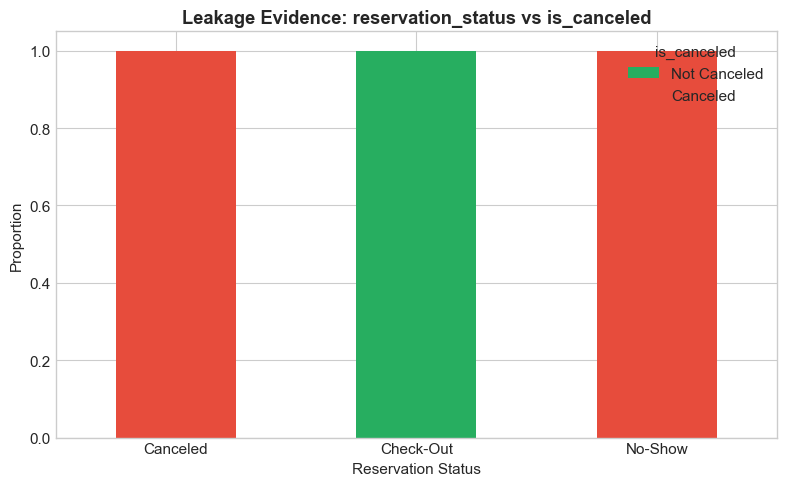

In [20]:
# Check reservation_status distribution
if 'reservation_status' in df.columns:
    print("="*60)
    print("⚠️  PHÁT HIỆN DATA LEAKAGE - reservation_status")
    print("="*60)
    print("\nPhân phối reservation_status:")
    status_dist = df['reservation_status'].value_counts()
    print(status_dist)
    
    # Cross-tab với target
    print("\n📊 Crosstab reservation_status vs is_canceled:")
    crosstab = pd.crosstab(df['reservation_status'], df['is_canceled'], margins=True)
    print(crosstab)
    
    print("\n🚨 CẢNH BÁO:")
    print("  - 'Canceled' status HOÀN TOÀN overlap với is_canceled=1")
    print("  - 'Check-Out' và 'No-Show' CHỈ có is_canceled=0")
    print("  → reservation_status là biến LEAKAGE, CẦN LOẠI BỎ!")
    
    # Visualize
    fig, ax = plt.subplots(figsize=(8, 5))
    crosstab_norm = pd.crosstab(df['reservation_status'], df['is_canceled'], normalize='index')
    crosstab_norm.plot(kind='bar', stacked=True, ax=ax, color=['#27ae60', '#e74c3c'])
    ax.set_title('Leakage Evidence: reservation_status vs is_canceled', fontweight='bold')
    ax.set_xlabel('Reservation Status')
    ax.set_ylabel('Proportion')
    ax.legend(title='is_canceled', labels=['Not Canceled', 'Canceled'])
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig('../outputs/figures/leakage_detection.png', dpi=150, bbox_inches='tight')
    plt.show()

In [21]:
# Additional leakage check: assigned_room_type vs reserved_room_type
if 'assigned_room_type' in df.columns and 'reserved_room_type' in df.columns:
    print("\n" + "="*60)
    print("📋 Kiểm tra: assigned_room_type vs reserved_room_type")
    print("="*60)
    
    # Room type mismatch
    room_mismatch = df['assigned_room_type'] != df['reserved_room_type']
    print(f"\nSố booking có room type khác nhau: {room_mismatch.sum()} ({room_mismatch.mean()*100:.2f}%)")
    
    # Correlation với cancellation
    mismatch_cancel_rate = df[room_mismatch]['is_canceled'].mean()
    match_cancel_rate = df[~room_mismatch]['is_canceled'].mean()
    
    print(f"\n  - Cancel rate khi room MATCH: {match_cancel_rate*100:.2f}%")
    print(f"  - Cancel rate khi room MISMATCH: {mismatch_cancel_rate*100:.2f}%")
    
    print("\n✅ assigned_room_type CÓ THỂ GIỮ LẠI vì:")
    print("   - Được assign KHI customer đến (không biết trước cancellation)")
    print("   - Tuy nhiên, cần cẩn thận với interpretation")

# List all columns to drop
print("\n" + "="*60)
print("📝 DANH SÁCH CÁC CỘT CẦN LOẠI BỎ")
print("="*60)
LEAKAGE_COLUMNS = ['reservation_status', 'reservation_status_date']
print(f"\n🚫 Leakage columns: {LEAKAGE_COLUMNS}")
print("   Lý do: Chứa thông tin về kết quả cuối cùng của booking")


📋 Kiểm tra: assigned_room_type vs reserved_room_type

Số booking có room type khác nhau: 14917 (12.49%)

  - Cancel rate khi room MATCH: 41.56%
  - Cancel rate khi room MISMATCH: 5.38%

✅ assigned_room_type CÓ THỂ GIỮ LẠI vì:
   - Được assign KHI customer đến (không biết trước cancellation)
   - Tuy nhiên, cần cẩn thận với interpretation

📝 DANH SÁCH CÁC CỘT CẦN LOẠI BỎ

🚫 Leakage columns: ['reservation_status', 'reservation_status_date']
   Lý do: Chứa thông tin về kết quả cuối cùng của booking


## 15. Outlier Detection 📊

Phát hiện và phân tích các outliers trong các biến numerical để quyết định chiến lược xử lý.

In [22]:
# Outlier detection using IQR method
def detect_outliers_iqr(df, column):
    """Detect outliers using IQR method"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return len(outliers), lower, upper, Q1, Q3

# Numerical columns to check
num_cols_outlier = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                    'adults', 'children', 'babies', 'previous_cancellations',
                    'previous_bookings_not_canceled', 'booking_changes',
                    'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
                    'total_of_special_requests']

outlier_summary = []
for col in num_cols_outlier:
    if col in df.columns:
        count, lower, upper, Q1, Q3 = detect_outliers_iqr(df, col)
        outlier_summary.append({
            'Column': col,
            'Outliers': count,
            'Pct_Outliers': count / len(df) * 100,
            'Q1': Q1,
            'Q3': Q3,
            'Lower_Bound': lower,
            'Upper_Bound': upper,
            'Min': df[col].min(),
            'Max': df[col].max()
        })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df = outlier_df.sort_values('Pct_Outliers', ascending=False)
print("📊 OUTLIER DETECTION SUMMARY (IQR Method)")
print("="*80)
display(outlier_df.round(2))

📊 OUTLIER DETECTION SUMMARY (IQR Method)


,Column,Outliers,Pct_Outliers,Q1,Q3,Lower_Bound,Upper_Bound,Min,Max
3,adults,29710,24.88,2.00,2.00,2.00,2.00,0.00,55.00
8,booking_changes,18076,15.14,0.00,0.00,0.00,0.00,0.00,21.00
4,children,8590,7.19,0.00,0.00,0.00,0.00,0.00,10.00
11,required_car_parking_spaces,7416,6.21,0.00,0.00,0.00,0.00,0.00,8.00
6,previous_cancellations,6484,5.43,0.00,0.00,0.00,0.00,0.00,26.00
10,adr,3793,3.18,69.29,126.00,-15.77,211.06,-6.38,5400.00
9,days_in_waiting_list,3698,3.10,0.00,0.00,0.00,0.00,0.00,391.00
7,previous_bookings_not_canceled,3620,3.03,0.00,0.00,0.00,0.00,0.00,72.00
2,stays_in_week_nights,3354,2.81,1.00,3.00,-2.00,6.00,0.00,50.00
0,lead_time,3005,2.52,18.00,160.00,-195.00,373.00,0.00,737.00


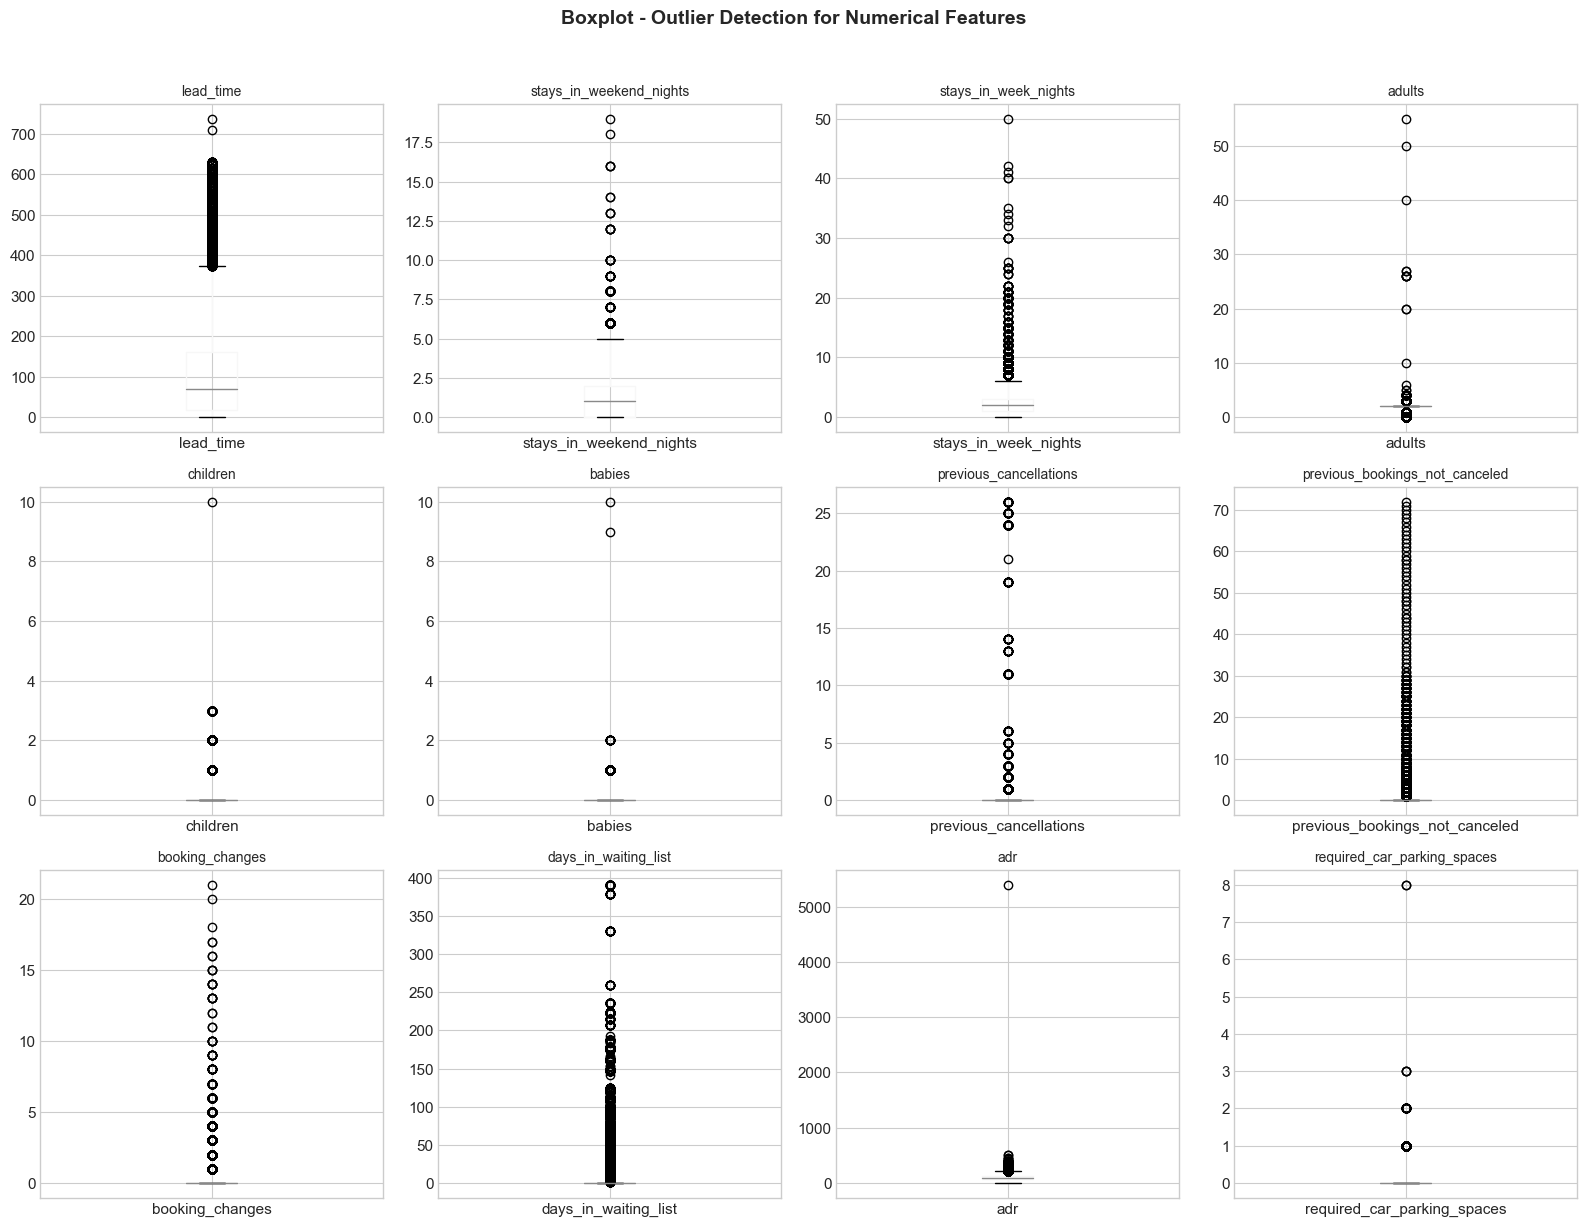


📌 Phân tích chi tiết ADR (Average Daily Rate):
   - Min: -6.38
   - Max: 5400.00
   - Median: 94.58
   - Mean: 101.83

   - Bookings với ADR > 1000: 1
   - Bookings với ADR < 0: 1

   🚨 Giá trị ADR âm là KHÔNG HỢP LỆ - cần xử lý!


In [23]:
# Visualize outliers using boxplots
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(num_cols_outlier[:12]):
    if col in df.columns:
        ax = axes[idx]
        df.boxplot(column=col, ax=ax)
        ax.set_title(col, fontsize=10)
        ax.set_xlabel('')

# Remove empty subplots if any
for idx in range(len(num_cols_outlier), len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Boxplot - Outlier Detection for Numerical Features', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../outputs/figures/outlier_boxplots.png', dpi=150, bbox_inches='tight')
plt.show()

# Specific analysis for ADR (important feature with many outliers)
print("\n📌 Phân tích chi tiết ADR (Average Daily Rate):")
print(f"   - Min: {df['adr'].min():.2f}")
print(f"   - Max: {df['adr'].max():.2f}")
print(f"   - Median: {df['adr'].median():.2f}")
print(f"   - Mean: {df['adr'].mean():.2f}")

# Check extreme ADR values
extreme_adr = df[df['adr'] > 1000]
negative_adr = df[df['adr'] < 0]
print(f"\n   - Bookings với ADR > 1000: {len(extreme_adr)}")
print(f"   - Bookings với ADR < 0: {len(negative_adr)}")

if len(negative_adr) > 0:
    print("\n   🚨 Giá trị ADR âm là KHÔNG HỢP LỆ - cần xử lý!")

## 16. Summary & Key Findings 📝

### Tổng kết các phát hiện quan trọng từ EDA

In [24]:
print("="*70)
print("📊 TÓM TẮT EDA - HOTEL BOOKING CANCELLATION PREDICTION")
print("="*70)

print("\n📈 1. THÔNG TIN DATASET:")
print(f"   - Tổng số records: {df.shape[0]:,}")
print(f"   - Số features: {df.shape[1]}")
print(f"   - Target: is_canceled (Binary)")

print("\n📊 2. CLASS IMBALANCE:")
cancel_rate = df['is_canceled'].mean() * 100
print(f"   - Not Canceled: {100-cancel_rate:.2f}%")
print(f"   - Canceled: {cancel_rate:.2f}%")
print(f"   → Imbalanced but manageable (ratio ~1:1.7)")
print(f"   → Solution: SMOTE, class_weight, hoặc stratified sampling")

print("\n🚫 3. MISSING VALUES:")
missing_cols = df.columns[df.isnull().any()].tolist()
print(f"   - Số cột có missing: {len(missing_cols)}")
for col in missing_cols:
    pct = df[col].isnull().mean() * 100
    print(f"     • {col}: {pct:.2f}% missing")
print("   → Solution:")
print("     • company (94%): Drop hoặc tạo binary flag")
print("     • agent (14%): Impute với mode/0 (no agent)")
print("     • country, children: Impute với mode/median")

print("\n⚠️  4. DATA LEAKAGE (CRITICAL):")
print("   CẦN LOẠI BỎ:")
print("   - reservation_status: Contains outcome information")
print("   - reservation_status_date: Temporal leakage")

print("\n📌 5. KEY FEATURES FOR PREDICTION (dựa trên EDA):")
key_features = """
   HIGH IMPORTANCE:
   - lead_time: Longer lead time → Higher cancellation
   - deposit_type: Non Refund có cancellation rate thấp nhất
   - market_segment: Online TA có cancel rate cao nhất
   - previous_cancellations: Strong positive correlation
   - total_of_special_requests: More requests → Less cancellation
   - adr: Higher ADR → Slightly higher cancellation
   
   MODERATE IMPORTANCE:
   - customer_type: Transient có cancel rate cao nhất
   - hotel: City Hotel có cancel rate cao hơn Resort
   - arrival_date_month: Seasonal patterns
   - country: Portugal (PRT) có cancel rate cao
"""
print(key_features)

print("\n🔧 6. PREPROCESSING RECOMMENDATIONS:")
print("   □ Drop: reservation_status, reservation_status_date")
print("   □ Handle missing: company, agent, country, children")
print("   □ Feature Engineering:")
print("     • total_stay = stays_in_weekend_nights + stays_in_week_nights")
print("     • total_guests = adults + children + babies")
print("     • is_repeated_guest flag")
print("     • arrival_date features (month, day_of_week, is_weekend)")
print("   □ Encoding: Label/One-hot for categorical features")
print("   □ Scaling: StandardScaler for numerical features")
print("   □ Outlier treatment: Cap extreme ADR values")

print("\n" + "="*70)
print("✅ EDA COMPLETED - Ready for Preprocessing & Modeling")
print("="*70)

📊 TÓM TẮT EDA - HOTEL BOOKING CANCELLATION PREDICTION

📈 1. THÔNG TIN DATASET:
   - Tổng số records: 119,390
   - Số features: 33
   - Target: is_canceled (Binary)

📊 2. CLASS IMBALANCE:
   - Not Canceled: 62.96%
   - Canceled: 37.04%
   → Imbalanced but manageable (ratio ~1:1.7)
   → Solution: SMOTE, class_weight, hoặc stratified sampling

🚫 3. MISSING VALUES:
   - Số cột có missing: 4
     • children: 0.00% missing
     • country: 0.41% missing
     • agent: 13.69% missing
     • company: 94.31% missing
   → Solution:
     • company (94%): Drop hoặc tạo binary flag
     • agent (14%): Impute với mode/0 (no agent)
     • country, children: Impute với mode/median

⚠️  4. DATA LEAKAGE (CRITICAL):
   CẦN LOẠI BỎ:
   - reservation_status: Contains outcome information
   - reservation_status_date: Temporal leakage

📌 5. KEY FEATURES FOR PREDICTION (dựa trên EDA):

   HIGH IMPORTANCE:
   - lead_time: Longer lead time → Higher cancellation
   - deposit_type: Non Refund có cancellation rate t

In [25]:
# Save EDA summary to file
eda_summary = """
# EDA Summary - Hotel Booking Cancellation Prediction
Generated: {timestamp}

## Dataset Overview
- Records: 119,390
- Features: 32
- Target: is_canceled (Binary: 0/1)
- Cancellation Rate: 37.04%

## Data Quality Issues
1. Missing Values:
   - company: 94.31% → Drop or create flag
   - agent: 13.69% → Impute with 0 (no agent)
   - country: 0.41% → Impute with mode
   - children: 0.00% (4 rows) → Impute with 0

2. Data Leakage:
   - MUST DROP: reservation_status, reservation_status_date

3. Outliers:
   - ADR has extreme values (max > 5000, negative values)
   - lead_time has values up to 737 days

## Key Insights
1. Lead Time: Strong positive correlation with cancellation
2. Deposit Type: Non Refund has lowest cancel rate
3. Market Segment: Online TA has highest cancel rate
4. Special Requests: Negative correlation with cancellation
5. Hotel Type: City Hotel has higher cancel rate than Resort

## Recommended Features
- lead_time
- deposit_type
- market_segment
- previous_cancellations
- total_of_special_requests
- adr
- customer_type
- is_repeated_guest
- Required feature engineering for temporal patterns
"""

from datetime import datetime
with open('../outputs/eda_summary.txt', 'w', encoding='utf-8') as f:
    f.write(eda_summary.format(timestamp=datetime.now().strftime('%Y-%m-%d %H:%M:%S')))
print("✅ EDA summary saved to outputs/eda_summary.txt")

✅ EDA summary saved to outputs/eda_summary.txt
